# EDA for 2023 StackOverflow Developer Survery

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

1. **Boring Imports**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install missingno
import missingno as msno
from os import system
from collections import Counter


In [3]:
import plotly.express as px # For Chloropleth Mapping. Wont be used

In [4]:
data = pd.read_csv('/content/drive/MyDrive/survey_results_public.csv')

2. **I want all rows to be seen**

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## **Stats**

In [ ]:
data.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [ ]:
print(data.size)
print(data.shape)

7491456
(89184, 84)


In [ ]:
data.describe()

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,89184.000000,4.822500e+04,43579.000000,4.801900e+04
mean,44592.500000,1.036807e+42,11.405126,1.031101e+05
std,25745.347541,2.276847e+44,9.051989,6.814188e+05
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,22296.750000,6.300000e+04,5.000000,4.390700e+04
50%,44592.500000,1.150000e+05,9.000000,7.496300e+04
75%,66888.250000,2.300000e+05,16.000000,1.216410e+05
max,89184.000000,5.000000e+46,50.000000,7.435143e+07


## **Missing Data Analysis**
- *First we create a copy for just in case we want to premanently alter the dataset*
- *Then we compute how many columns have missing data and how many of them in total are there*
- *Getting the missing indices and using them to create a new dataset is extermely time conumsing using traditional programming.*
- *We use this library called missingno for creating graphs of such.*

In [ ]:
nanvalues = data.columns[data.isnull().any()]
nanvalues

Index(['Employment', 'RemoteWork', 'CodingActivities', 'EdLevel', 'LearnCode',
       'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro',
       'DevType', 'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool',
       'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWantToWorkWith', 'AIDevHaveWorkedWith', 'AIDevWantToW

<Axes: >

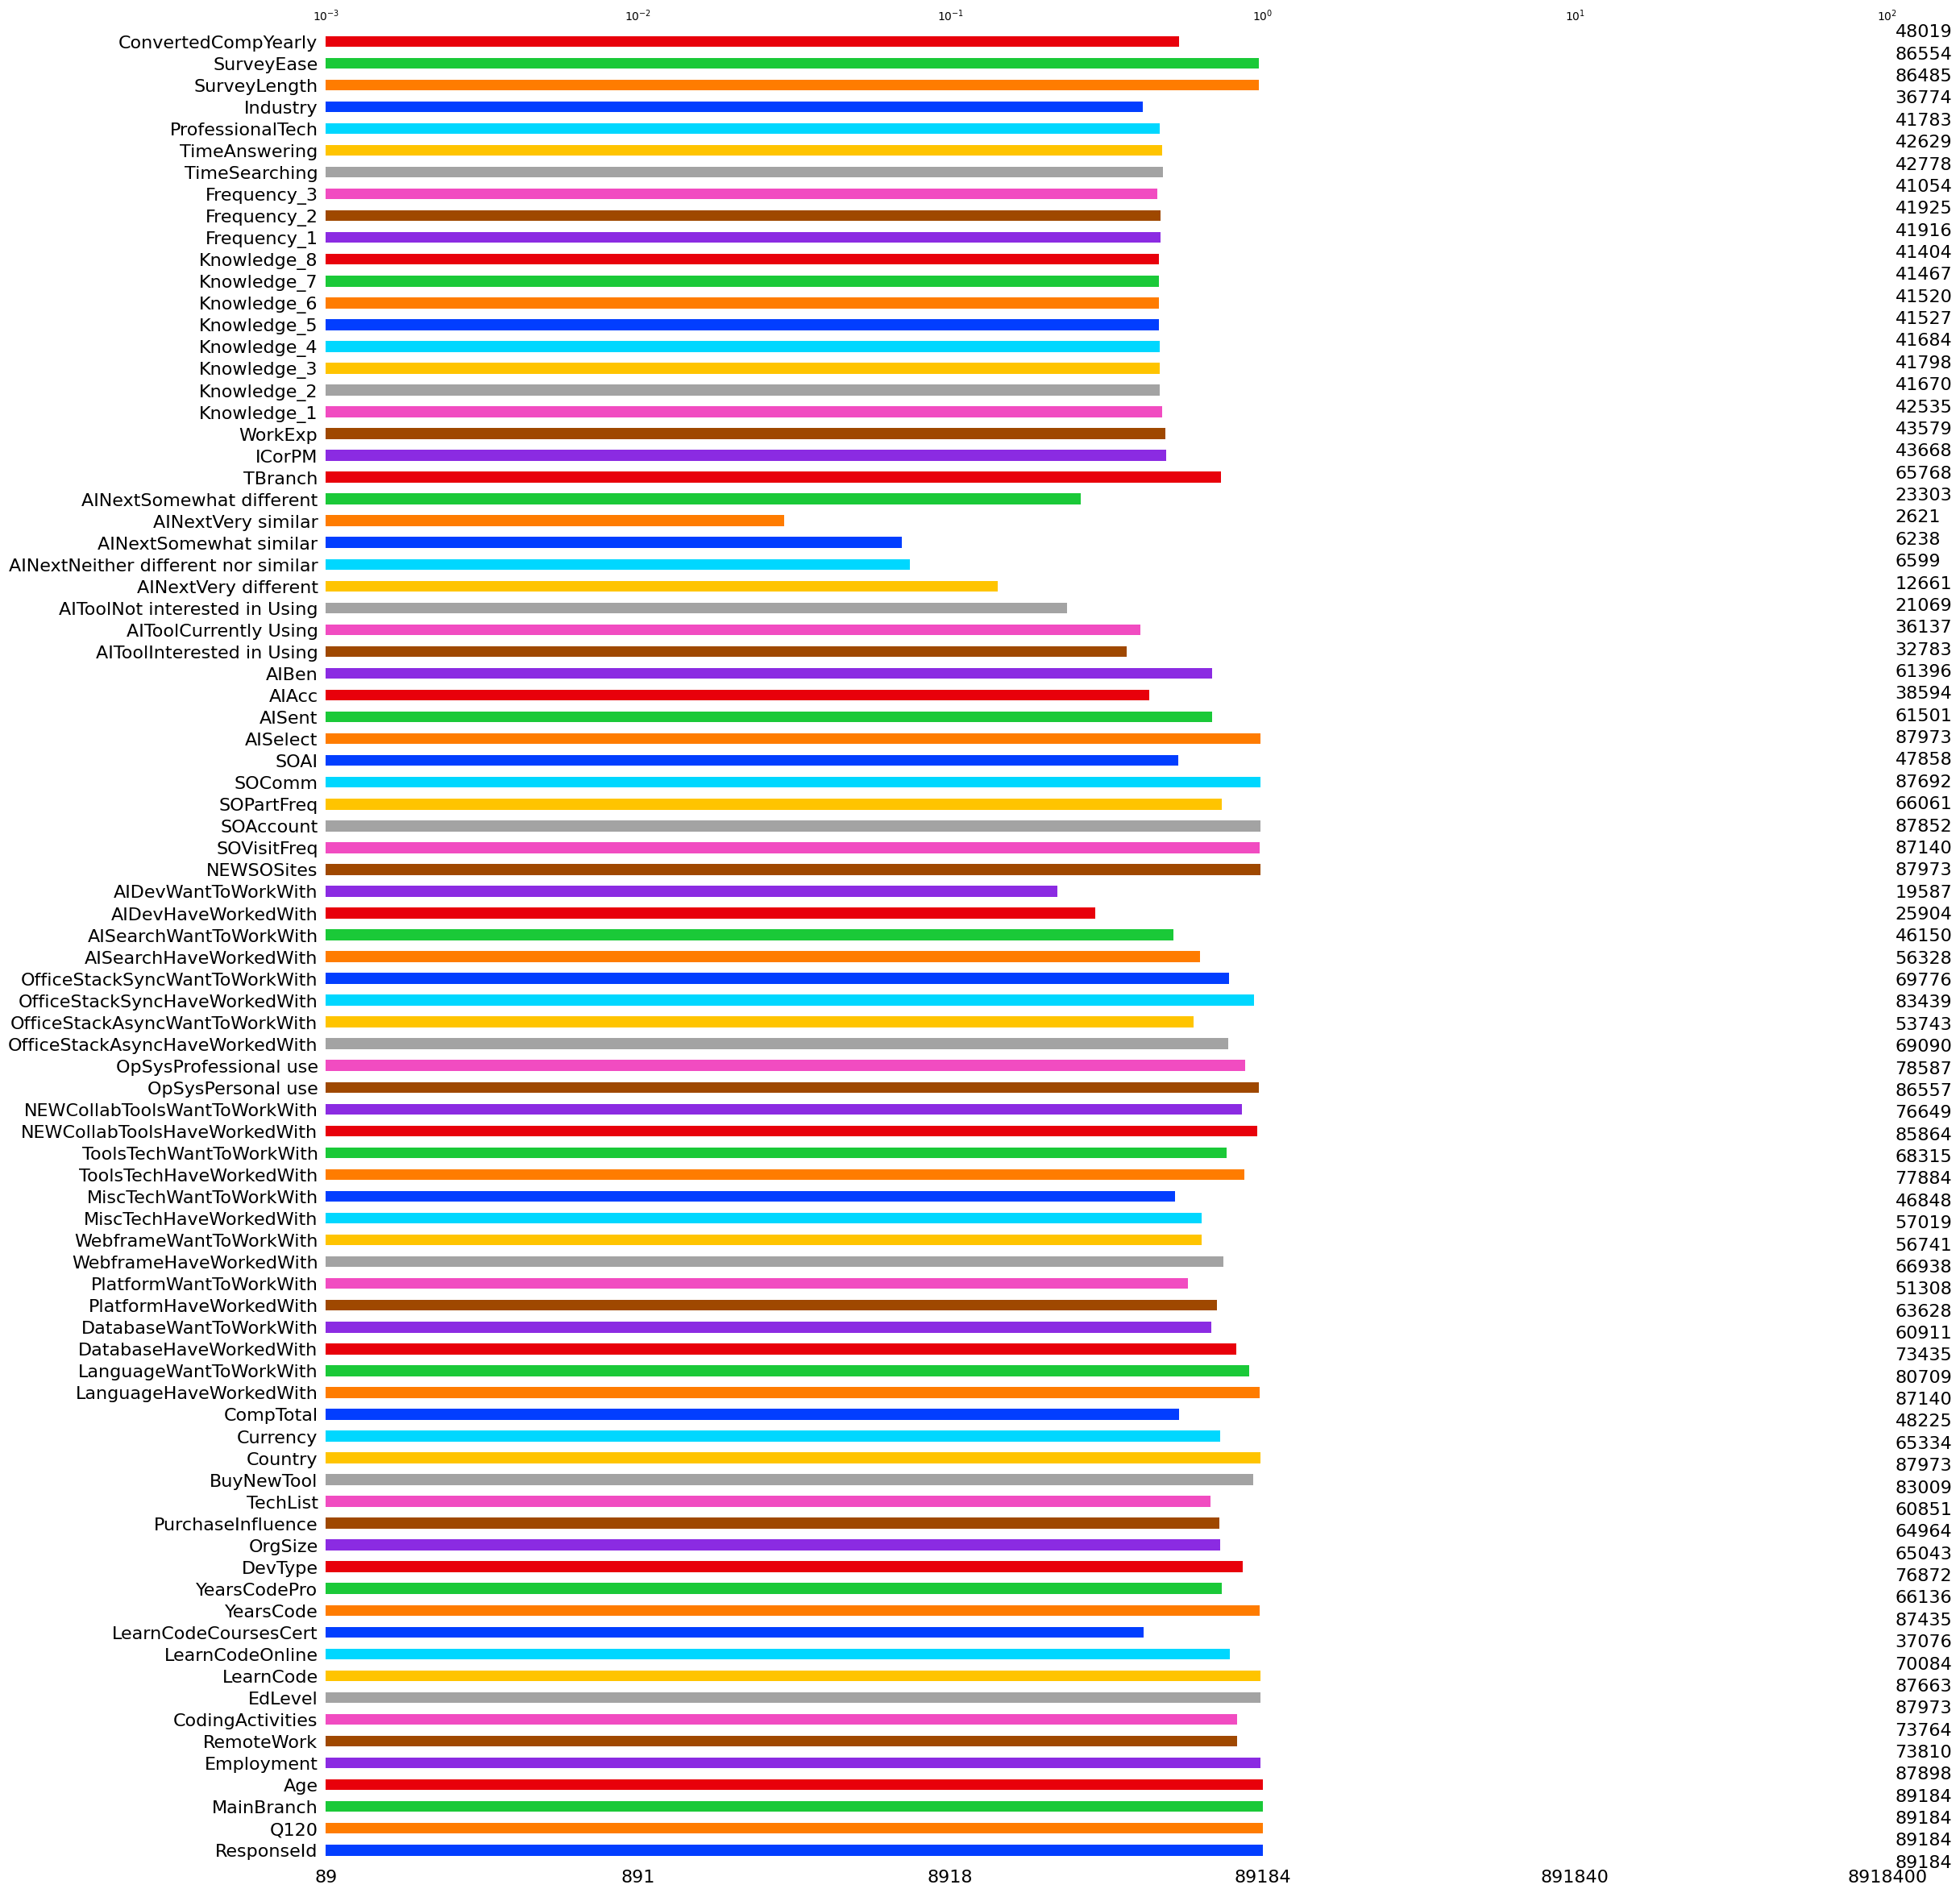

In [ ]:
msno.bar(data,log=True,color = sns.color_palette("bright"))

**The meaning of the question string from above bar plot can be explored from the public schema CSV from StackOverflow.** *(**Its like 169 KB**)*

**The below cell removes the missing data rows and puts it to a csv file which will be processed further by the magic of shell**

In [55]:
lang_list = data['LanguageHaveWorkedWith'].dropna()
type(lang_list)

lang_list.to_csv('data.csv', index=False)

In [ ]:
lang_list

## **Some Madness some Badness with bash**

- Grep the CSV of all the LanguageHaveWorkedWith for all the langauges that exist and redirect it to langlist.txt
- Feed the txt file into a python list

In [56]:
!grep -oE '[^;]+' /content/data.csv | sort | uniq > langlist.txt
f = open('/content/langlist.txt','r')
v = f.read()

listLangx = v.replace('\n',' ').split()
f.close()
listLangx

['Ada',
 'Apex',
 'APL',
 'Assembly',
 'Bash/Shell',
 '(all',
 'shells)',
 'C',
 'C#',
 'C++',
 'Clojure',
 'Cobol',
 'Crystal',
 'Dart',
 'Delphi',
 'Elixir',
 'Erlang',
 'F#',
 'Flow',
 'Fortran',
 'GDScript',
 'Go',
 'Groovy',
 'Haskell',
 'HTML/CSS',
 'Java',
 'JavaScript',
 'Julia',
 'Kotlin',
 'LanguageHaveWorkedWith',
 'Lisp',
 'Lua',
 'MATLAB',
 'Nim',
 'Objective-C',
 'OCaml',
 'Perl',
 'PHP',
 'PowerShell',
 'Prolog',
 'Python',
 'R',
 'Raku',
 'Ruby',
 'Rust',
 'SAS',
 'Scala',
 'Solidity',
 'SQL',
 'Swift',
 'TypeScript',
 'VBA',
 'Visual',
 'Basic',
 '(.Net)',
 'Zig']

In [ ]:
''' Forget this. Just realized that ages are in ranges with strings appended to it and
Python being one of the most advanced language makes a fuss about type conversions. Just fix it already '''

' Forget this. Just realized that ages are in ranges with strings appended to it and\nPython being one of the most advanced language makes a fuss about type conversions. Just fix it already '

## Education is Important
Find the percentage of people with education levels such as Bachelor's, Masters and so on

**Don't know what the issue is but when ever I try run the below cells, my machine freezes. Tried force rebooting 5 times already. Now, I wont do this. Ig its a problem of the high volume of data send to the client from the T4 holding server**

In [ ]:
#countryx = data['Country'].dropna().drop_duplicates().tolist()
#countryx

In [ ]:
#data['CompTotal'].iloc[1:100]

In [ ]:
#dummy = data.copy()
#dummy = dummy.dropna(subset=["CompTotal"])
#dummy['CompTotal']


#fig = px.choropleth(dummy,
#                    locations='Country',
#                    locationmode='country names',
#                    color='CompTotal',
#                    hover_name='Country',
#                    title='Salary')
#fig.show()

In [ ]:
#fig = px.choropleth(data, locationmode='country names', color='CompTotal')
#fig.show()

In [6]:
removeNaEducation = data.dropna(subset=['EdLevel'])
removeNaEducation

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0
5,6,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Professional development or self-paced l...,Some college/university study without earning ...,Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,30-60 minutes a day,15-30 minutes a day,DevOps function;Microservices;Observability to...,Other,Appropriate in length,Neither easy nor difficult,96828.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,89180,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Bootstrapping a business;Freelance/contr...,"Associate degree (A.A., A.S., etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89180,89181,I agree,I am a developer by profession,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
89181,89182,I agree,I code primarily as a hobby,Prefer not to say,I prefer not to say,NaN,NaN,Something else,Books / Physical media;Hackathons (virtual or ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89182,89183,I agree,I am a developer by profession,Under 18 years old,"Employed, part-time;Student, part-time","Hybrid (some remote, some in-pe

In [19]:
removeNaEducation['EdLevel'].value_counts() # All unique entries
list_all_ed = removeNaEducation['EdLevel'].unique().tolist()
list_all_ed
trunc_all_ed = []
for i in list_all_ed:
    trunc_all_ed.append(i.split(' (')[0])
trunc_all_ed

['Bachelor’s degree',
 'Some college/university study without earning a degree',
 'Master’s degree',
 'Primary/elementary school',
 'Professional degree',
 'Associate degree',
 'Secondary school',
 'Something else']

Text(0.5, 1.0, 'Eduction Levels')

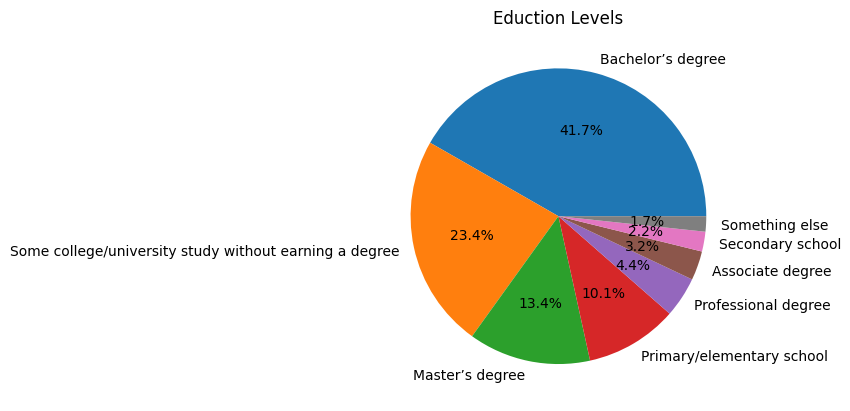

In [21]:
plt.pie(removeNaEducation['EdLevel'].value_counts(),labels = trunc_all_ed,autopct='%1.1f%%')
plt.title('Eduction Levels')

## Revisit the langs

In [28]:
languageList = data['LanguageHaveWorkedWith'].dropna().str.split(';')
languageList

languageList = [lang for sublist in languageList for lang in sublist]
languageList

['HTML/CSS',
 'JavaScript',
 'Python',
 'Bash/Shell (all shells)',
 'Go',
 'Bash/Shell (all shells)',
 'HTML/CSS',
 'JavaScript',
 'PHP',
 'Ruby',
 'SQL',
 'TypeScript',
 'HTML/CSS',
 'JavaScript',
 'TypeScript',
 'Bash/Shell (all shells)',
 'HTML/CSS',
 'JavaScript',
 'Ruby',
 'SQL',
 'TypeScript',
 'Ada',
 'Clojure',
 'Elixir',
 'Go',
 'HTML/CSS',
 'Java',
 'JavaScript',
 'Lisp',
 'OCaml',
 'Raku',
 'Ruby',
 'Scala',
 'Swift',
 'TypeScript',
 'Zig',
 'Go',
 'HTML/CSS',
 'JavaScript',
 'Python',
 'Rust',
 'SQL',
 'TypeScript',
 'C#',
 'JavaScript',
 'PowerShell',
 'Ruby',
 'TypeScript',
 'HTML/CSS',
 'Java',
 'JavaScript',
 'Python',
 'SQL',
 'TypeScript',
 'C#',
 'C++',
 'HTML/CSS',
 'JavaScript',
 'Python',
 'C#',
 'HTML/CSS',
 'JavaScript',
 'Kotlin',
 'PowerShell',
 'Python',
 'SQL',
 'TypeScript',
 'Bash/Shell (all shells)',
 'Elixir',
 'HTML/CSS',
 'JavaScript',
 'Ruby',
 'Solidity',
 'TypeScript',
 'C',
 'C++',
 'Python',
 'Rust',
 'Java',
 'Perl',
 'TypeScript',
 'Bash/Shell (

In [33]:
languageCount = Counter(languageList)
finalChartList = languageCount.most_common(10) # Yields a list
finalChartList

list

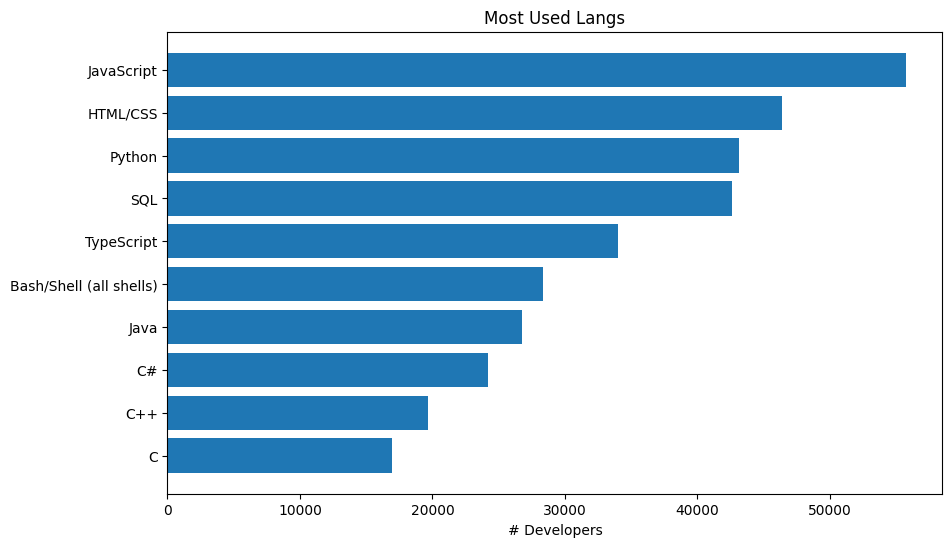

In [36]:
languages, counts = zip(*finalChartList)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(languages, counts)
plt.xlabel('# Developers')
plt.title('Most Used Langs')
plt.gca().invert_yaxis()
plt.show()

## Is more better? Or is it just experience?

In [41]:
data.dropna(subset=['Age', 'LanguageHaveWorkedWith'], inplace=True)
data['LangList'] = data['LanguageHaveWorkedWith'].str.split(';') # Yield new column
data['NumberOfLangs'] = data['LangList'].apply(len)

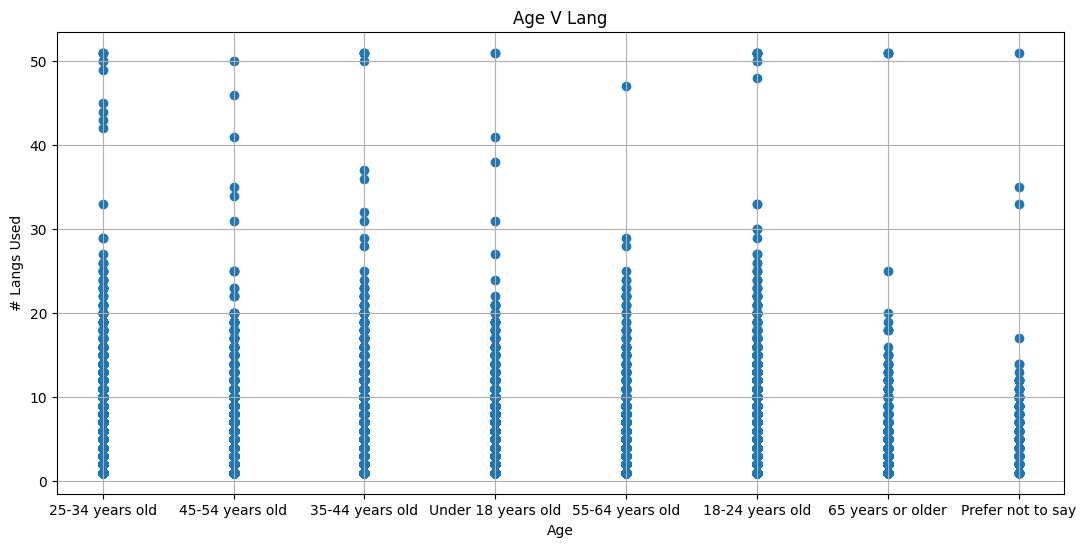

In [49]:
# Now for the rusty old scatterplot

#plt.figure()
plt.figure(figsize=(13,6))
plt.scatter(data['Age'], data['NumberOfLangs'])
plt.xlabel('Age')
plt.ylabel('# Langs Used')
plt.grid(True)
plt.title('Age V Lang')
plt.show()

## But really what do hipppies like and what does an oldie like?

In [63]:
languages_of_interest = ['Python', 'C', 'Rust', 'JavaScript', 'Java', 'SQL']
data['extLangList'] = data['LanguageHaveWorkedWith'].str.split(';')
data['extLangList']
#data['LanguageHaveWorkedWith']

6        [Ada, Clojure, Elixir, Go, HTML/CSS, Java, Jav...
58                      [C, C++, Java, Julia, Python, Zig]
131                       [C, C++, Lua, Python, Rust, Zig]
512      [Bash/Shell (all shells), C, Lua, MATLAB, Powe...
935      [Bash/Shell (all shells), C++, Go, HTML/CSS, J...
                               ...                        
88661    [Ada, Apex, APL, Assembly, Bash/Shell (all she...
88748    [Assembly, Bash/Shell (all shells), C, C#, C++...
88939    [Assembly, Bash/Shell (all shells), C, C++, Go...
88965    [Assembly, Bash/Shell (all shells), C, C#, C++...
89030    [Bash/Shell (all shells), HTML/CSS, Java, Java...
Name: extLangList, Length: 729, dtype: object

In [64]:
filtered_data = {}
#for i in listLangx:
#    filtered_data[i] = data[data['extLangList'].apply(lambda x: i in x)]
for i in languages_of_interest:
    filtered_data[i] = data[data['extLangList'].apply(lambda x: i in x)]

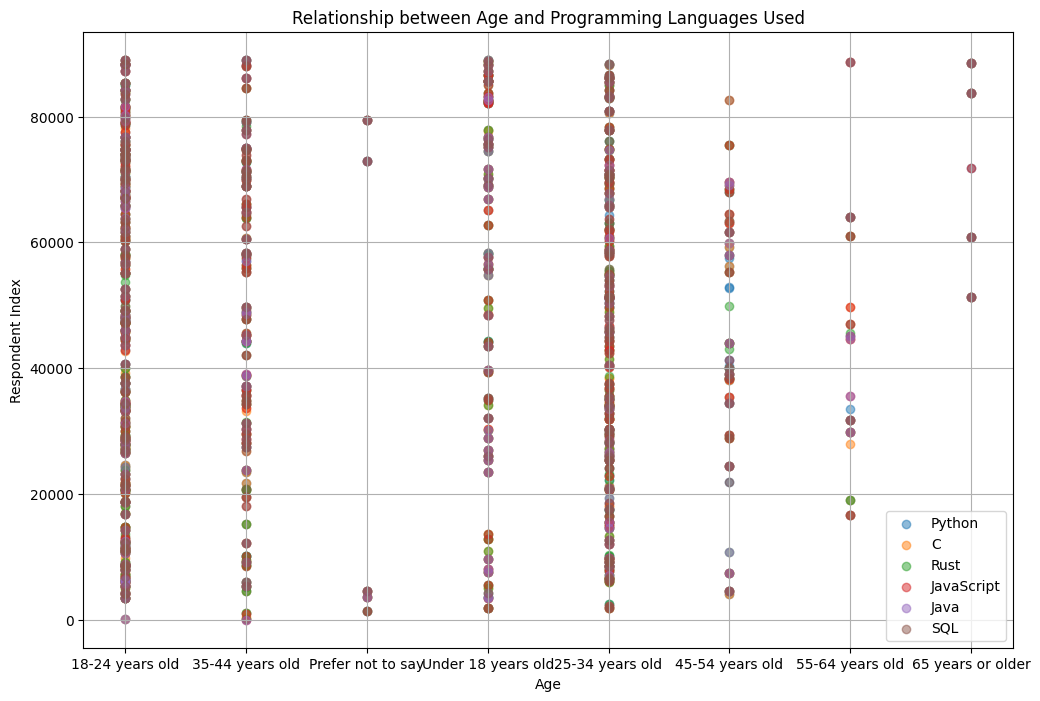

In [65]:
plt.figure(figsize=(12, 8))
for lang, data in filtered_data.items():
    plt.scatter(data['Age'], data.index, label=lang, alpha=0.5)

plt.title('Relationship between Age and Programming Languages Used')
plt.xlabel('Age')
plt.ylabel('Respondent Index')
plt.legend()
plt.grid(True)
plt.show()